<a href="https://colab.research.google.com/github/roliveira15/Data_Science_Sales_Forecast/blob/main/Sales_Forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1) Carregando as bibliotecas

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2) Importando o dataFrame

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot


### 3) Importando Dataframe

In [84]:
from google.colab import data_table
data_table.enable_dataframe_formatter()
df = pd.read_csv('https://raw.githubusercontent.com/roliveira15/Data_Science_Sales_Forecast/main/base.csv', sep = ';')
df.dtypes

tipo_frete                      object
peso                            object
valor_total_pedido              object
data                            object
abreviatura_uf                  object
regiao                          object
grupo_gerencial_produto         object
conta_numero_pedido_vendedor     int64
dtype: object

### 4) Converter o peso e o valor em float

Por padrão todas as variáveis do tipo string são armazenadas como object por esse motivo toda vez que tentamos modifcar de object para str, quando geramos o dtypes, as variáveis permanecem object. https://statisticsglobe.com/convert-object-data-type-string-pandas-dataframe-column-python





In [85]:
df['peso'] = df['peso'].str.replace(',','.').astype(float)
df['valor_total_pedido'] = df['valor_total_pedido'].str.replace(',','.').astype(float)
df['data'] = pd.to_datetime(df['data'])

df.dtypes

tipo_frete                              object
peso                                   float64
valor_total_pedido                     float64
data                            datetime64[ns]
abreviatura_uf                          object
regiao                                  object
grupo_gerencial_produto                 object
conta_numero_pedido_vendedor             int64
dtype: object

###5) Criar uma coluna de Ano e mês

In [86]:
df['ano'] = df['data'].dt.year
df['mes'] = df['data'].dt.month

df.dtypes

tipo_frete                              object
peso                                   float64
valor_total_pedido                     float64
data                            datetime64[ns]
abreviatura_uf                          object
regiao                                  object
grupo_gerencial_produto                 object
conta_numero_pedido_vendedor             int64
ano                                      int64
mes                                      int64
dtype: object

### 6) Criando estrutura para gerar gráfico de estruturas por ano, mes em função de peso e valor_total_pedido 

In [320]:
groupStructures = df.groupby(['grupo_gerencial_produto','ano','mes','data','tipo_frete','regiao','abreviatura_uf']).sum()

groupStructures = groupStructures.round({'valor_total_pedido': 0,'peso': 0}).groupby(['grupo_gerencial_produto','ano','mes','data','tipo_frete','regiao','abreviatura_uf']).sum().reset_index()
groupStructures.loc[(groupStructures['valor_total_pedido'] > 0) & (groupStructures['data'] >= '2020-09-01')]


,grupo_gerencial_produto,ano,mes,data,tipo_frete,regiao,abreviatura_uf,peso,valor_total_pedido,conta_numero_pedido_vendedor
3,AUTOMACAO,2020,9,2020-09-10,CIF,Sudeste,ES,1343.0,79000.0,1
5,AUTOMACAO,2020,11,2020-11-08,CIF,Sudeste,ES,811.0,56550.0,1
6,AUTOMACAO,2021,1,2021-01-04,CIF,Sudeste,ES,3830.0,333060.0,1
7,AUTOMACAO,2021,1,2021-01-05,CIF,Nordeste,RN,8845.0,610800.0,1
8,AUTOMACAO,2021,3,2021-03-08,CIF,Sudeste,SP,2542.0,2052312.0,1
...,...,...,...,...,...,...,...,...,...,...
4558,UNIVERSAL,2023,5,2023-05-15,FOB,Sudeste,ES,6628.0,10605.0,1
4559,UNIVERSAL,2023,6,2023-06-02,FOB,Sudeste,ES,8721.0,13954.0,1
4560,UNIVERSAL,2023,6,2023-06-04,FOB,Sudeste,ES,4955.0,7928.0,1
4561,UNIVERSAL,2023,7,2023-07-03,FOB,Sudeste,ES,8695.0,13912.0,1


6.1) Declara as variáveis principais do produto, data e região

In [264]:
PPint = groupStructures.loc[(groupStructures['grupo_gerencial_produto'] == 'PORTA PALLET') & (groupStructures['data'] >= '2020-01-01') & (groupStructures['data'] < '2024-01-01') & (groupStructures['regiao'] == 'Norte')]
PP = groupStructures.loc[(groupStructures['grupo_gerencial_produto'] == 'PORTA PALLET') & (groupStructures['data'] >= '2022-01-01') & (groupStructures['data'] < '2023-01-01') & (groupStructures['regiao'] == 'Norte')]
PPanterior = groupStructures.loc[(groupStructures['grupo_gerencial_produto'] == 'PORTA PALLET') & (groupStructures['data'] >= '2021-01-01') & (groupStructures['data'] < '2022-01-01') & (groupStructures['regiao'] == 'Norte')]
PPanteriorA = groupStructures.loc[(groupStructures['grupo_gerencial_produto'] == 'PORTA PALLET') & (groupStructures['data'] >= '2020-01-01') & (groupStructures['data'] < '2021-01-01') & (groupStructures['regiao'] == 'Norte')]

6.2) Criando gráfico por estrutura


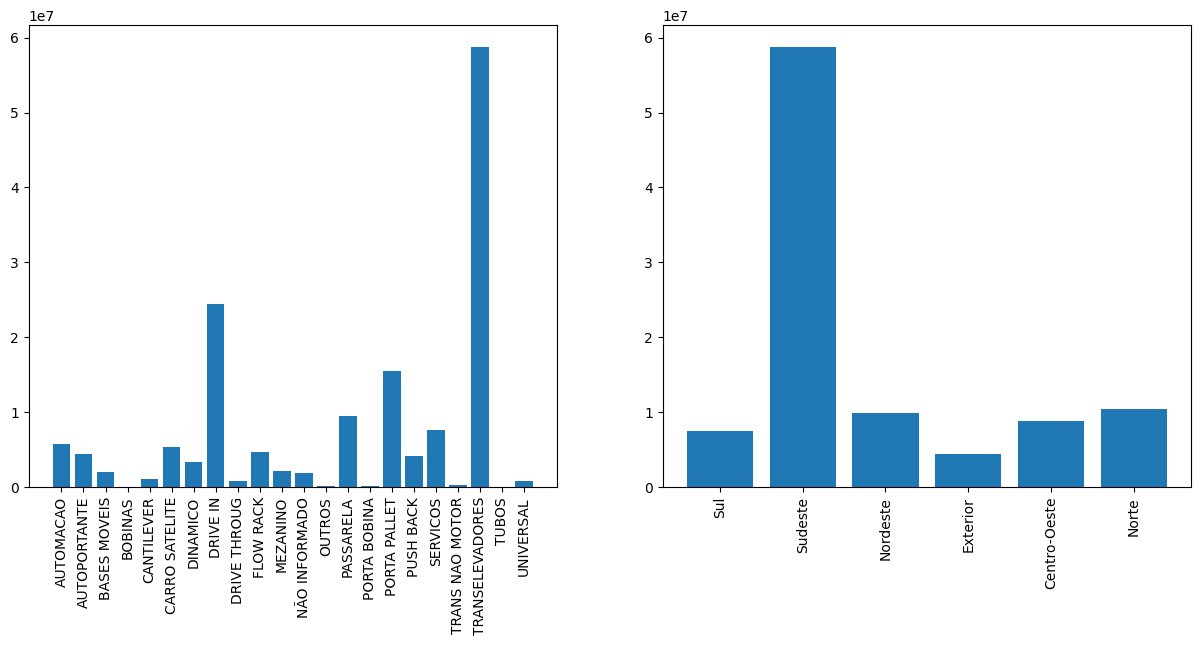

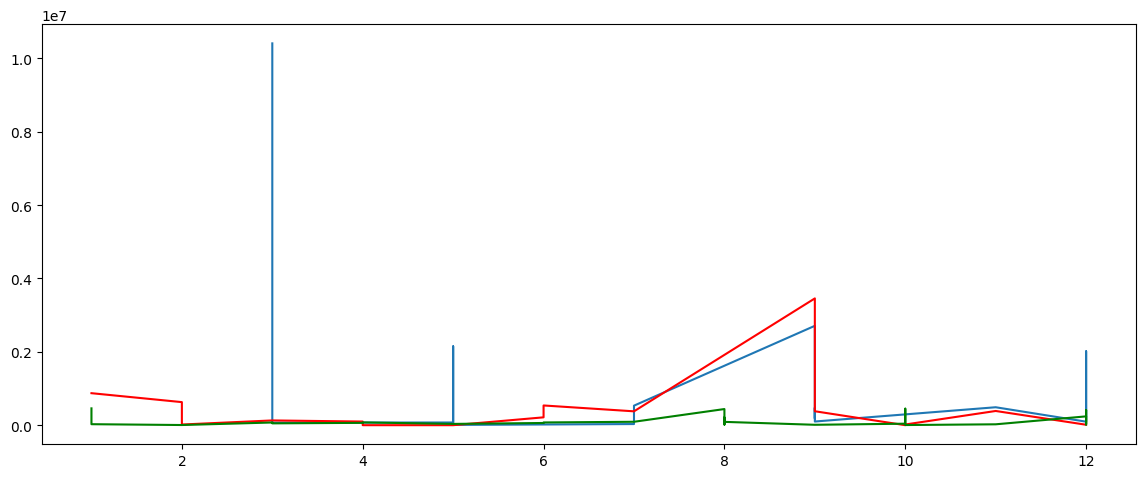

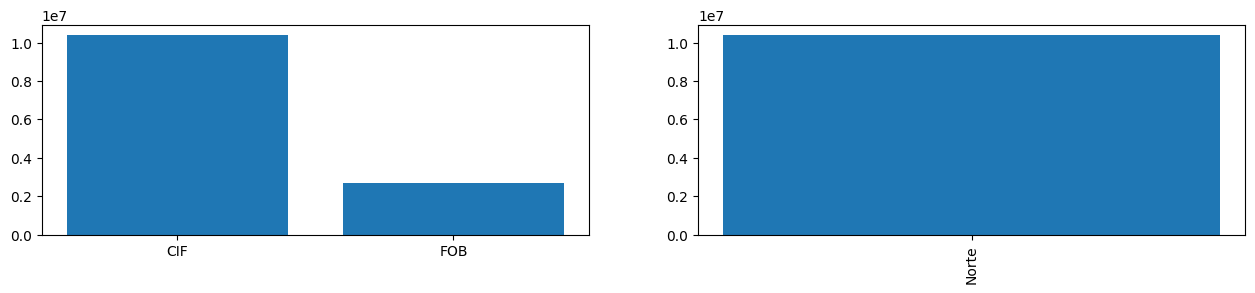

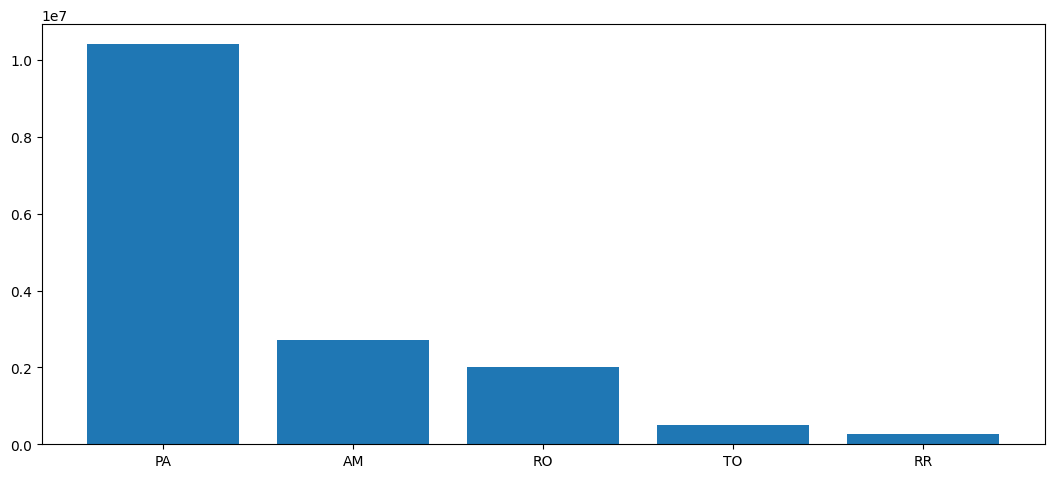

In [265]:

'''
                                  PORTA PALETE
'''
#Gráfico de barras de 
plt.figure(figsize = ((15, 6)))
plt.subplot(1, 2, 1)
plt.bar(groupStructuresTotal['grupo_gerencial_produto'], groupStructuresTotal['valor_total_pedido'])
plt.xticks(rotation=90)
plt.subplot(1, 2, 2)
plt.bar(groupStructuresTotal['regiao'], groupStructuresTotal['valor_total_pedido'])
plt.xticks(rotation=90)

plt.figure(figsize = ((48, 12)))
#Anual
plt.subplot(2, 3, 3)
plt.plot(PP['mes'],PP['valor_total_pedido'])
plt.plot(PPanterior['mes'],PPanterior['valor_total_pedido'],color='red')
plt.plot(PPanteriorA['mes'],PPanteriorA['valor_total_pedido'],color='green')
plt.show()

plt.figure(figsize = ((24, 6)))
#Tipo de frete
plt.subplot(2, 3, 1)
plt.bar(PP['tipo_frete'], PP['valor_total_pedido'])
#Região
plt.subplot(2, 3, 2)
plt.bar(PP['regiao'], PP['valor_total_pedido'])
plt.xticks(rotation=90)
#Estado
plt.figure(figsize = ((44, 12)))
plt.subplot(2, 3, 4)
plt.bar(PP['abreviatura_uf'],PP['valor_total_pedido'])
plt.show()




Realizar a plotagem de todos os grupos para entender o comportadomento dos gráficos

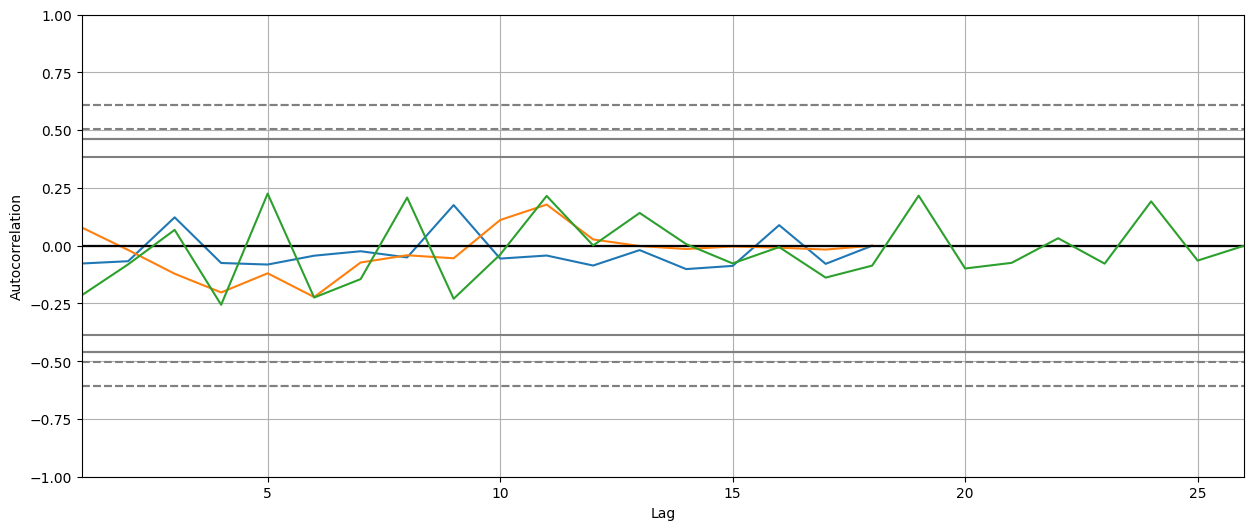

In [266]:
autocorrelation_plot(PP['valor_total_pedido'])
autocorrelation_plot(PPanterior['valor_total_pedido'])
autocorrelation_plot(PPanteriorA['valor_total_pedido'])
plt.show()

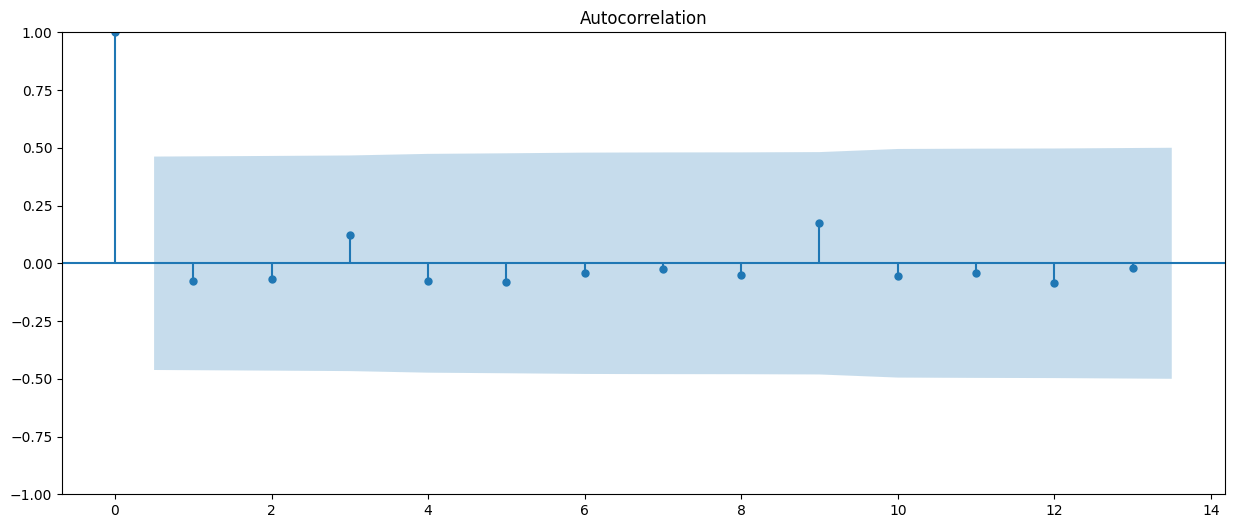

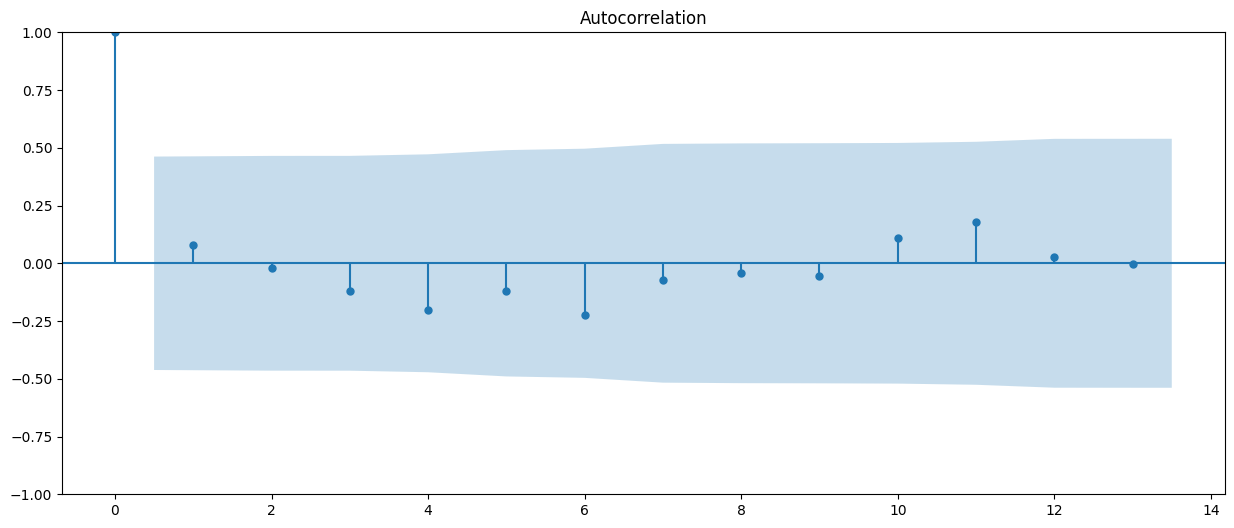

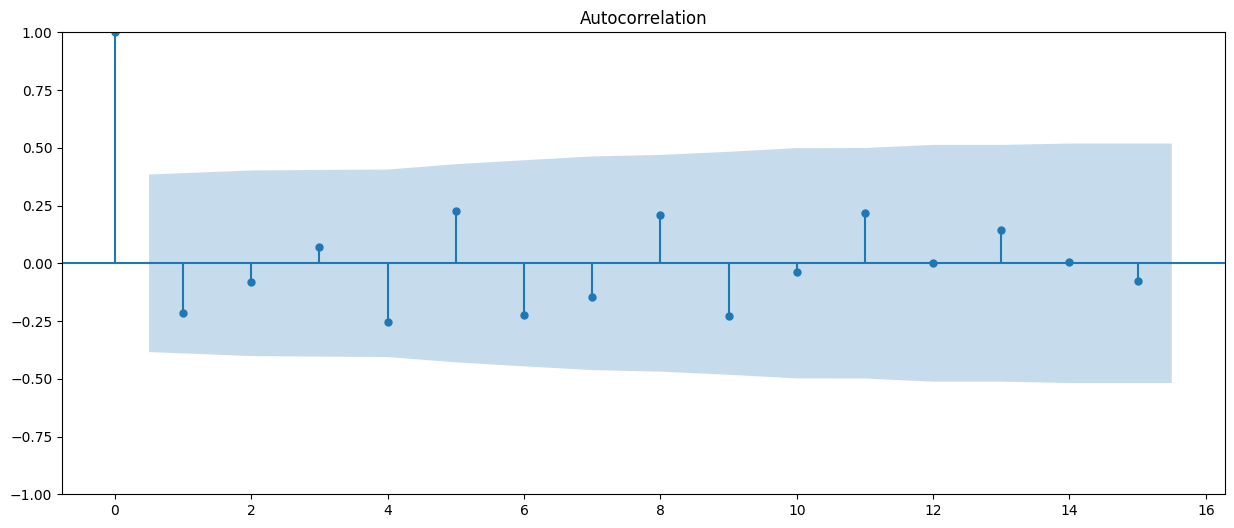

In [267]:
import pandas.util.testing as tm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

plot_acf(PP['valor_total_pedido'])
plot_acf(PPanterior['valor_total_pedido']) 
plot_acf(PPanteriorA['valor_total_pedido']) 
plt.show()

In [156]:
! pip install pmdarima


from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

from pmdarima.arima import auto_arima
from pmdarima import arima
from pmdarima.utils import tsdisplay, autocorr_plot, decomposed_plot, plot_acf, plot_pacf
from matplotlib.pyplot import rcParams
rcParams['figure.figsize']=15,6
from pmdarima.arima import ADFTest
from statsmodels.tsa.statespace.sarimax import SARIMAX

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.10/dist-packages/pmdarima/utils/visualization.py:220: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead.
  res = tsaplots.plot_acf(


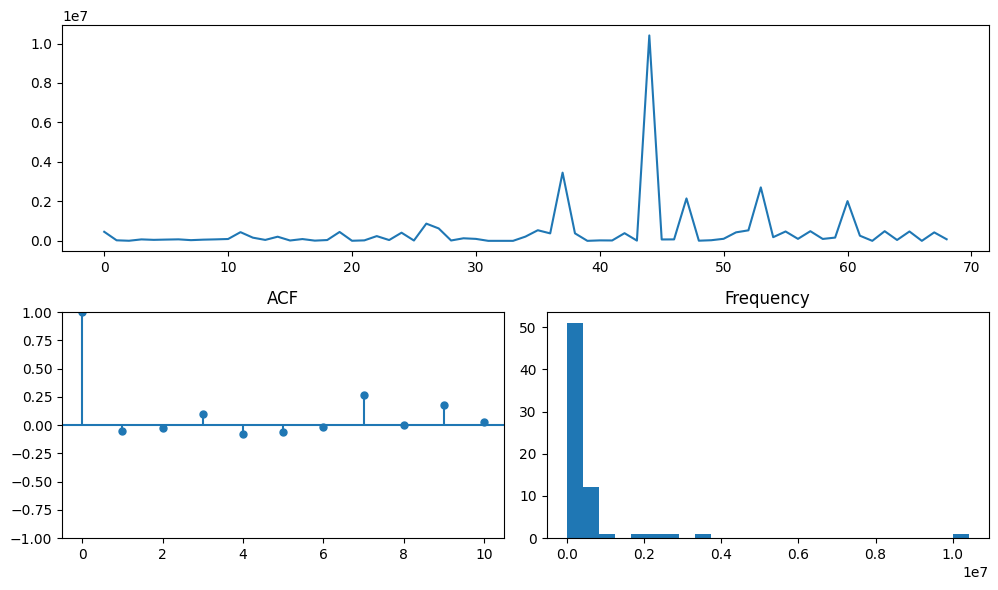

In [268]:
tsdisplay(PPint['valor_total_pedido'],lag_max=10,figsize=(10,6))

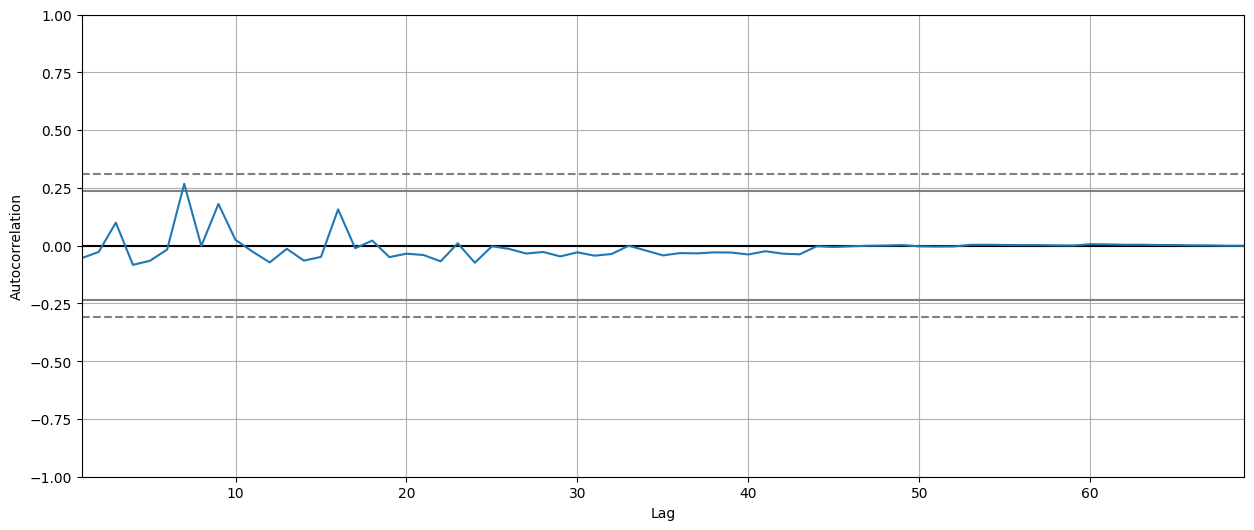

In [269]:
autocorr_plot(PPint['valor_total_pedido'])

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


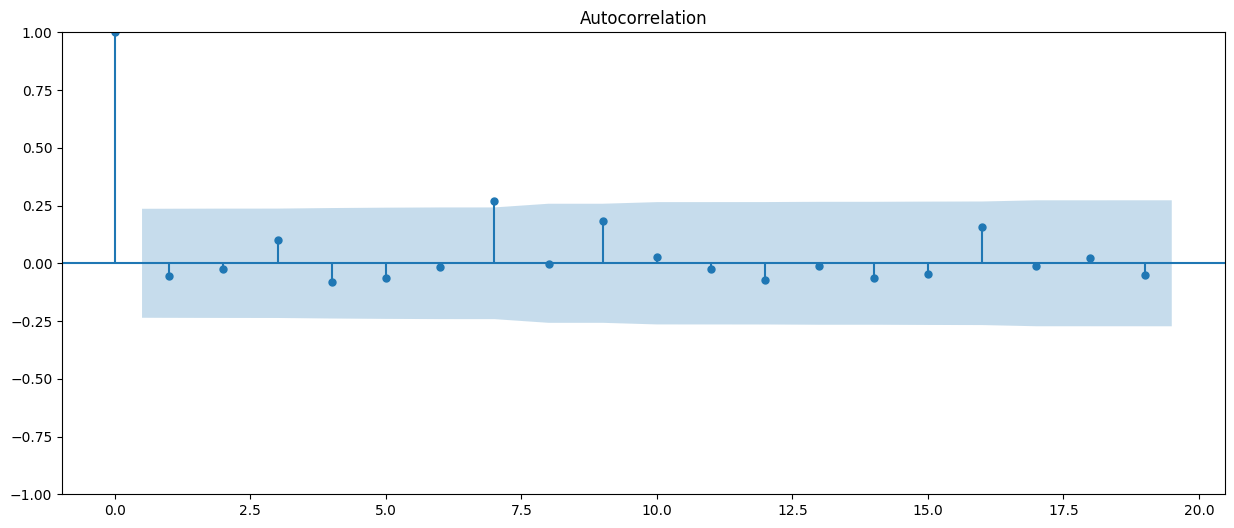

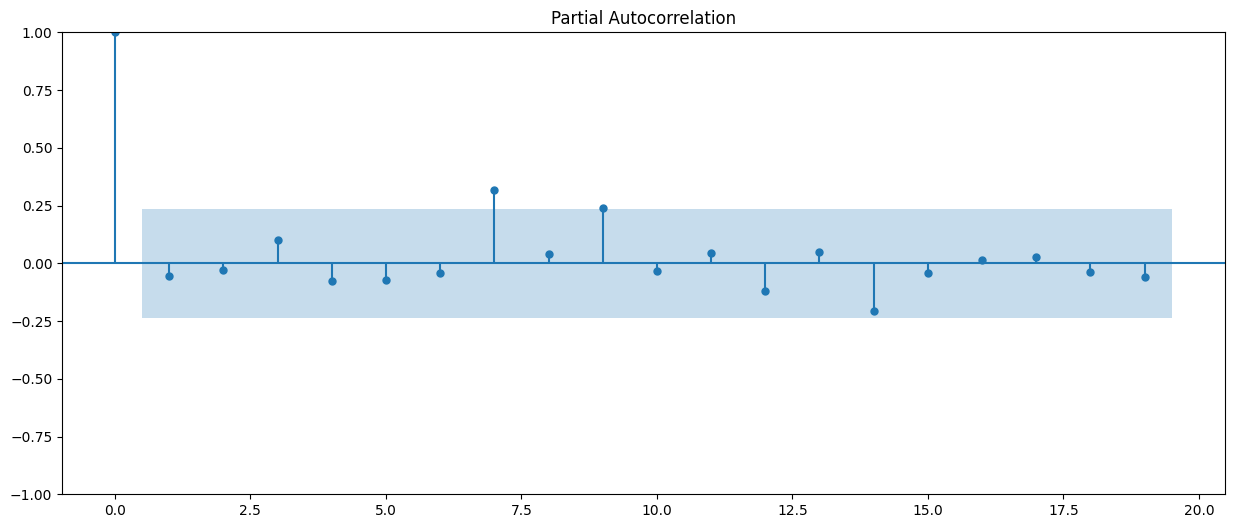

In [270]:
plot_acf(PPint['valor_total_pedido'], alpha=0.05);
plot_pacf(PPint['valor_total_pedido'], alpha=0.05);

In [271]:
stepwise=auto_arima(PPint['valor_total_pedido'],
                    start_p=0,
                    start_q=0,
                    d=0,
                    max_p=6,
                    max_q=6,
                    max_d=2,
                    start_P=1,
                    start_Q=1,
                    D=1,
                    max_P=2, max_D=1, max_Q=2, max_order=5,
                    m=12,
                    seasonal=True,
                    trace=True,
                    error_action='ignore',suppress_warnings=True,
                    stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=1809.403, Time=0.09 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1828.299, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1817.653, Time=0.06 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=1811.909, Time=0.07 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1827.445, Time=0.01 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=1808.079, Time=0.05 sec
 ARIMA(0,0,0)(0,1,2)[12] intercept   : AIC=1809.074, Time=0.12 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1815.564, Time=0.04 sec
 ARIMA(0,0,0)(1,1,2)[12] intercept   : AIC=1810.514, Time=0.34 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=1810.393, Time=0.09 sec
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=1813.683, Time=0.15 sec
 ARIMA(0,0,0)(0,1,1)[12]             : AIC=inf, Time=0.08 sec

Best model:  ARIMA(0,0,0)(0,1,1)[12] intercept
Total fit time: 1.123 seconds


In [272]:
stepwise

ARIMA(order=(0, 0, 0), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True)

In [273]:
print(stepwise.aic())
print(stepwise.bic())

1808.0791040892661
1814.2082578927698


In [357]:
PPtreino = groupStructures[['valor_total_pedido','data']].loc[(groupStructures['grupo_gerencial_produto'] == 'PORTA PALLET') & (groupStructures['data'] >= '2020-01-01') & (groupStructures['data'] < '2022-01-01') & (groupStructures['regiao'] == 'Norte')]
PPtest = groupStructures[['valor_total_pedido','data','mes']].loc[(groupStructures['grupo_gerencial_produto'] == 'PORTA PALLET') & (groupStructures['data'] >= '2022-01-01') & (groupStructures['data'] < '2023-01-01') & (groupStructures['regiao'] == 'Norte')]

In [358]:
stepwise.fit(PPtest['data'])

ARIMA(order=(0, 0, 0), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True)

In [371]:
previsao = stepwise.predict(n_periods=12)

display(previsao.reset_index())

tesstee = df.groupby(['mes']).sum().reset_index()
tesstee
#PPtest[['mes','valor_total_pedido']].reset_index()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


,index,0
0,18,1.676200e+18
1,19,1.676719e+18
2,20,1.677064e+18
3,21,1.680175e+18
4,22,1.682162e+18
5,23,1.682335e+18
6,24,1.682424e+18
7,25,1.687003e+18
8,26,1.688904e+18
9,27,1.689768e+18


<ipython-input-371-385ab4d14c38>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tesstee = df.groupby(['mes']).sum().reset_index()


,mes,peso,valor_total_pedido,conta_numero_pedido_vendedor,ano
0,1,2.767105e+07,1.427791e+08,433,751988
1,2,5.275436e+06,5.295686e+07,380,648930
2,3,9.731954e+06,1.324889e+08,607,986537
3,4,1.858760e+07,1.131388e+08,466,747942
4,5,6.933794e+06,7.781688e+07,421,711463
5,6,2.182624e+07,1.044219e+08,375,630609
6,7,1.271110e+07,8.658558e+07,432,725536
7,8,3.054888e+07,1.566715e+08,582,921585
8,9,1.846111e+07,1.495694e+08,588,883222
9,10,5.500883e+06,7.248948e+07,537,871147


In [374]:
display(previsao[].reset_index())

previsao=pd.DataFrame(previsao,index=tesstee.index, columns=['previsão modelo 1'])



,index,previsão modelo 1
0,0,NaN
1,1,NaN
2,2,NaN
3,3,NaN
4,4,NaN
5,5,NaN
6,6,NaN
7,7,NaN
8,8,NaN
9,9,NaN
